In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks, peak_prominences
import os
import analysis_lag as ana
from phil_ducial_points import detrend
import seaborn as sns
from scipy import stats

In [2]:
messungen = [
    {
        "date": "2021_02_02",
        "dish": 1,
        "frames": 400, 
        "er": "./Adenosine Oscillation/2021_02_02_Ado40s_dish1_2_ER.csv",
        "cy": "./Adenosine Oscillation/2021_02_02_Ado40s_dish1_2_CY.csv"
    },{
        "dish": 2,
        "date": "2021_02_04",
        "frames": 400,
        "er": "./Adenosine Oscillation/2021_02_04_Ado40s_dish2_1_ER.csv",
        "cy": "./Adenosine Oscillation/2021_02_04_Ado40s_dish2_1_CY.csv"
    },{
        "dish": 3,
        "date": "2021_02_04",
        "frames": 400,
        "er": "./Adenosine Oscillation/2021_02_04_Ado40s_dish3_1_ER.csv",
        "cy": "./Adenosine Oscillation/2021_02_04_Ado40s_dish3_1_CY.csv"
    },{
        "dish": 4,
        "date": "2021_02_05",
        "frames": 400,
        "er": "./Adenosine Oscillation/2021_02_05_Ado40s_dish4_1_ER.csv",
        "cy": "./Adenosine Oscillation/2021_02_05_Ado40s_dish4_1_CY.csv"
    },{
        "dish": 3,
        "date": "2021_03_01",
        "frames": 400,
        "er": "./Adenosine Oscillation/2021_03_01_Ado40s_dish3_2_ER.csv",
        "cy": "./Adenosine Oscillation/2021_03_01_Ado40s_dish3_2_CY.csv"        
    }
]



In [311]:
messung = 3
er = ana.ReadData(directory=messungen[messung]["er"])
cy = ana.ReadData(directory=messungen[messung]["cy"])

In [312]:
analyse = ana.CellData(er=er, cy=cy)

C:\Users\emsch\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


-6.013

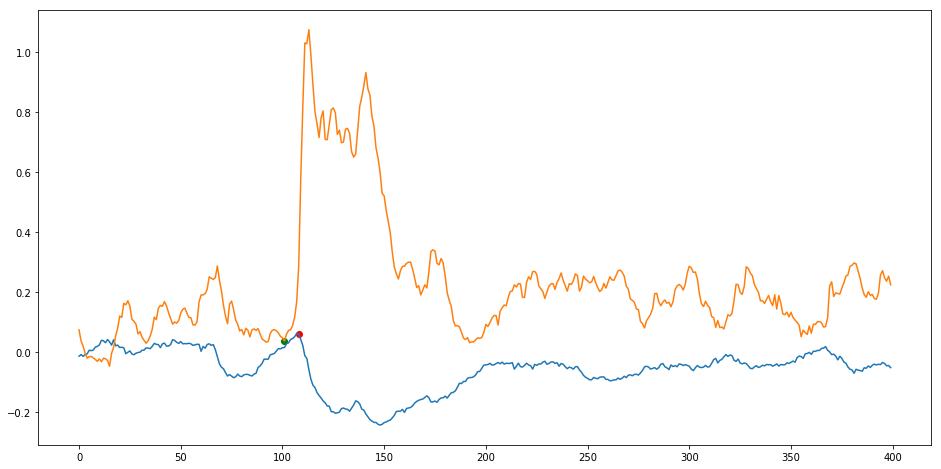

In [313]:
plt.figure(figsize=(16,8))
plt.plot(analyse.avg_signal_er)
plt.scatter(analyse.experiment_start_er, analyse.avg_signal_er[analyse.experiment_start_er], c="r")

plt.plot(analyse.avg_signal_cy)
plt.scatter(analyse.experiment_start_cy, analyse.avg_signal_cy[analyse.experiment_start_cy], c="g")

(analyse.experiment_start_cy - analyse.experiment_start_er)*0.859

0
before_during_after


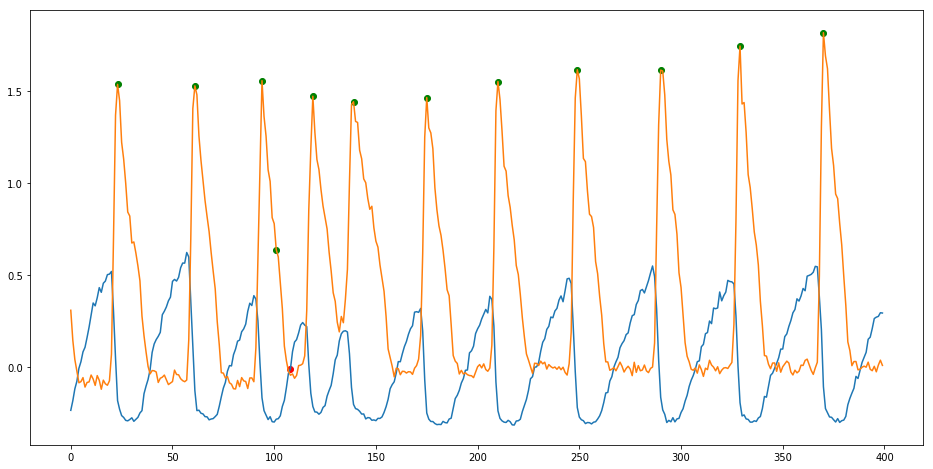

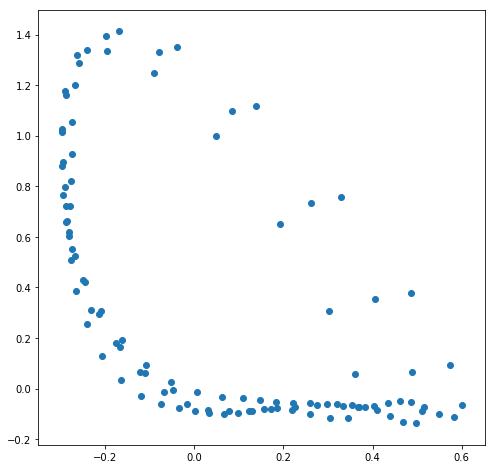

2.0129297185588766
1
before_during


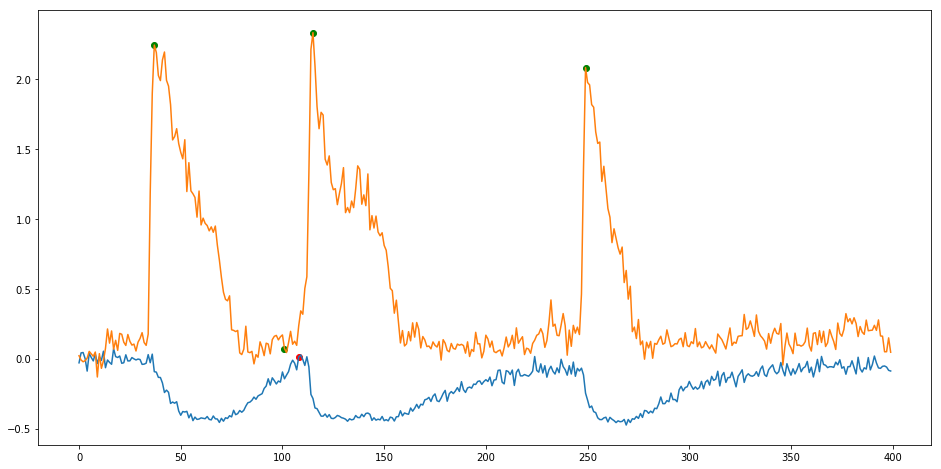

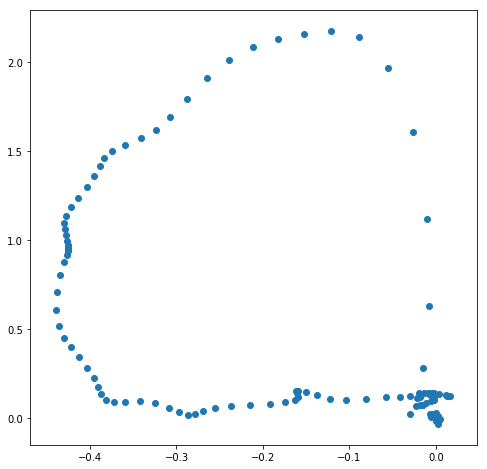

0.658949634282953
2
before_during_after


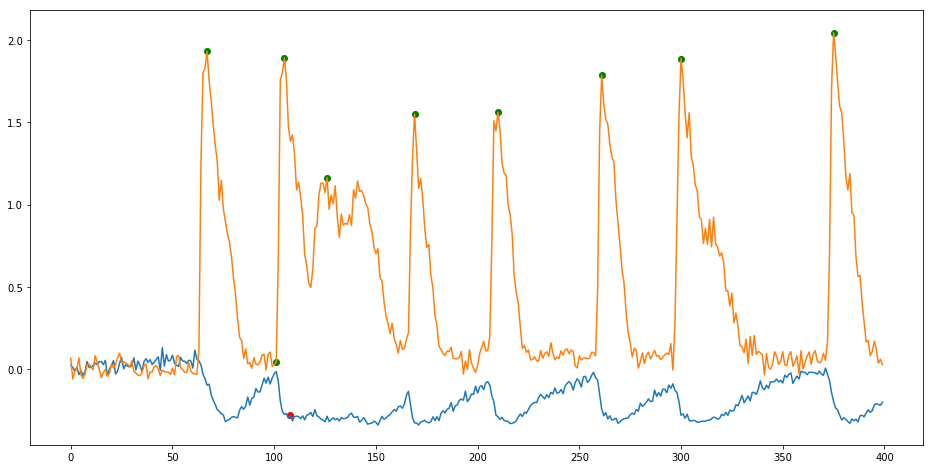

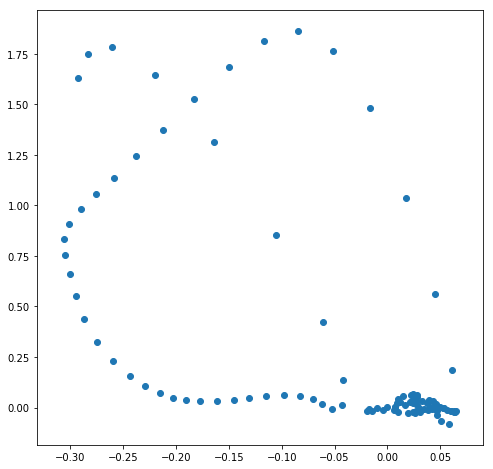

1.7986779716908075
3
before_during_after


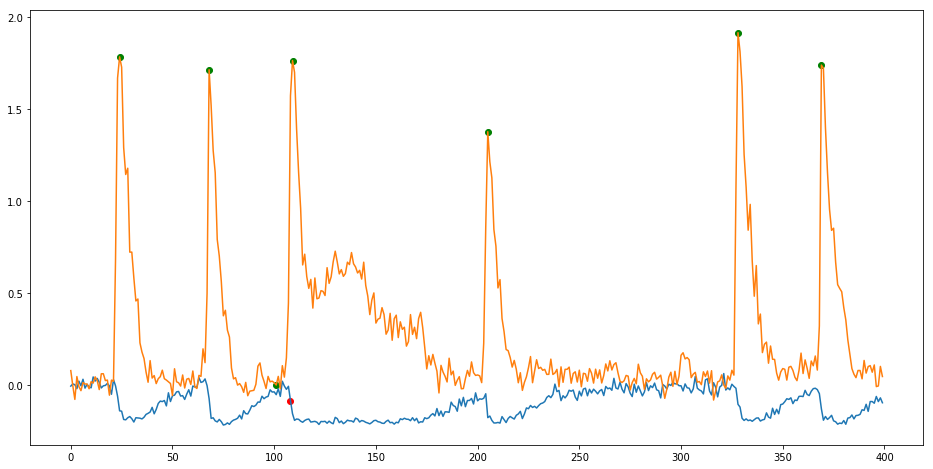

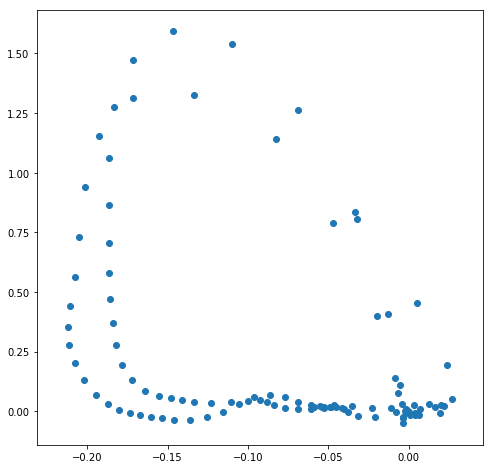

1.2585344366485227
4
before_during_after


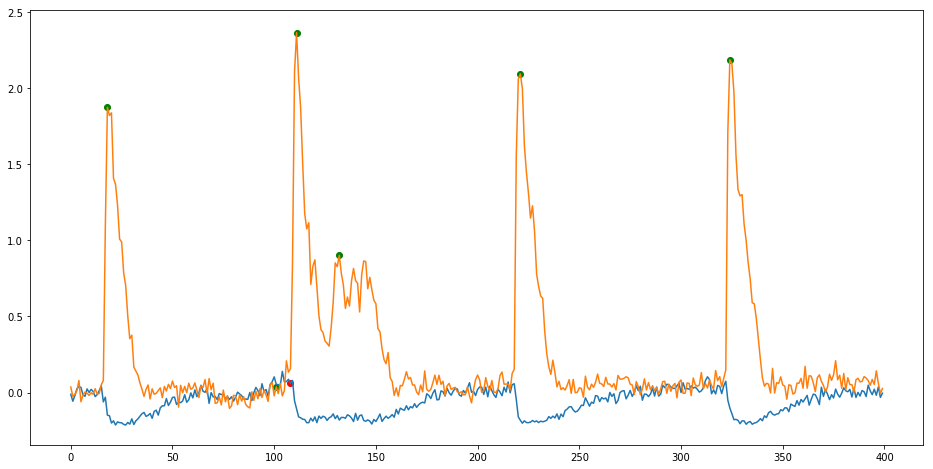

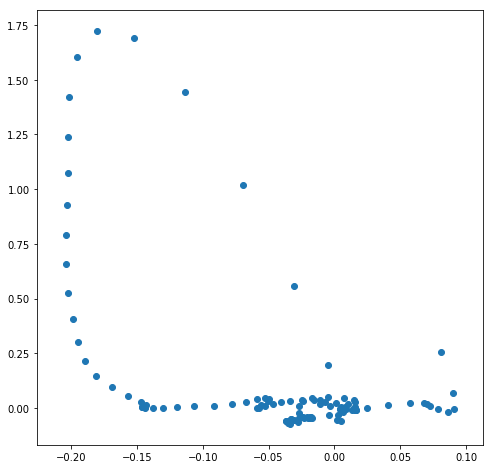

3.3261267254282383
5
during


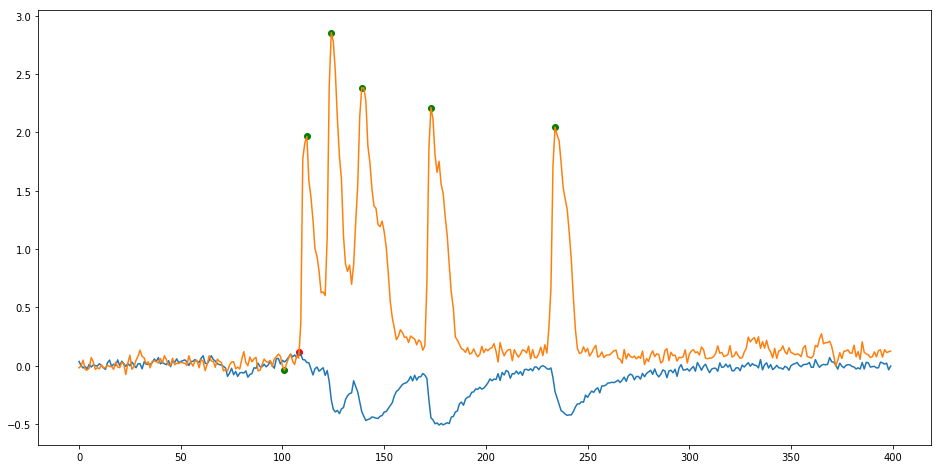

5.173974906221705
6
during


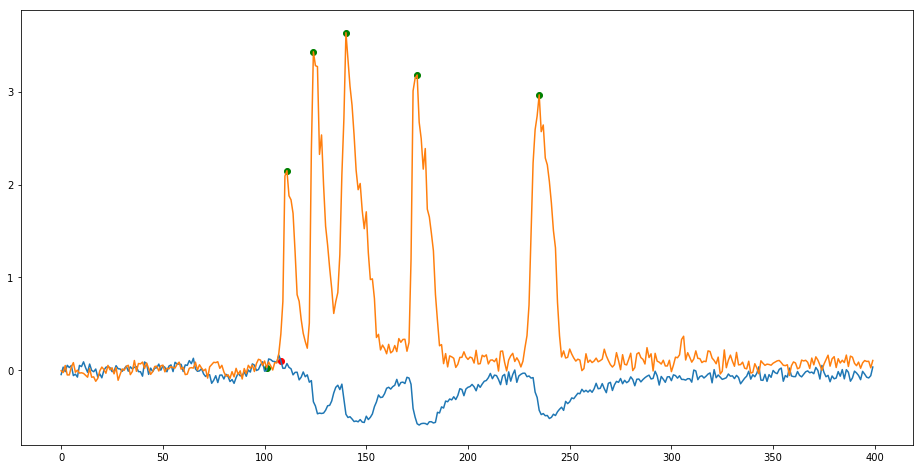

4.817149050620208
7
during_after


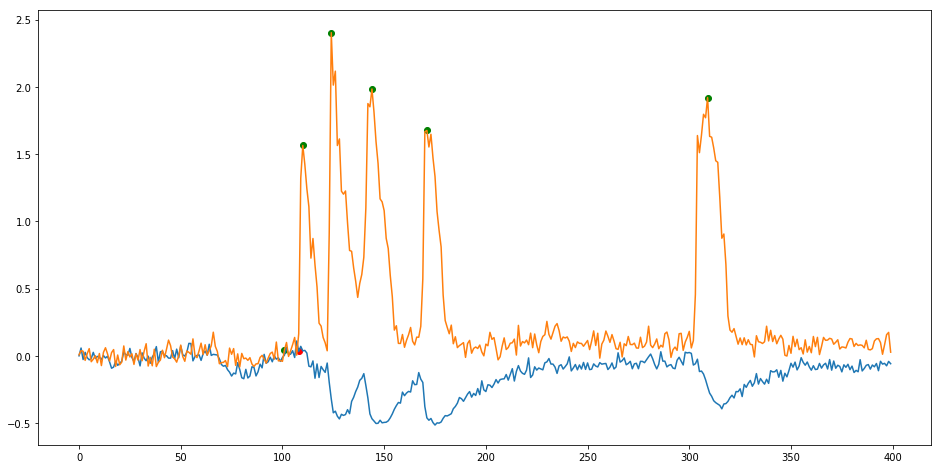

3.4351800606881815
8
before_during_after


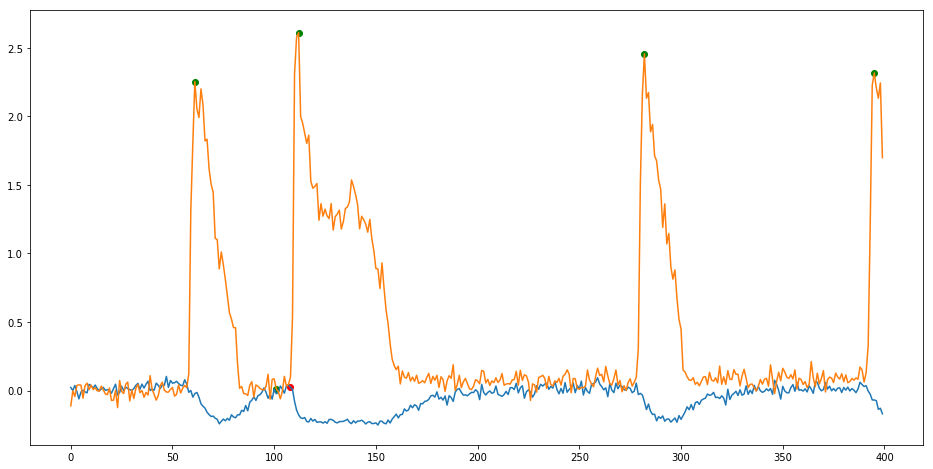

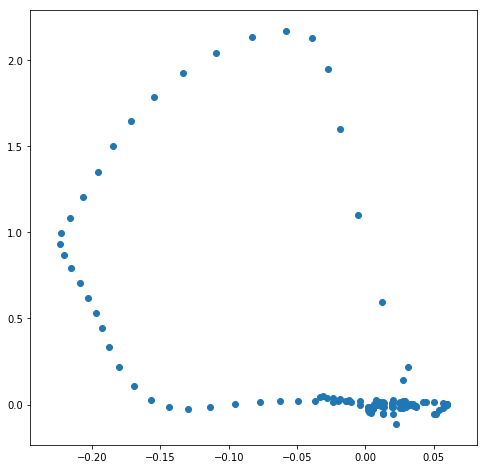

0.8518129418779636
9
before_during_after


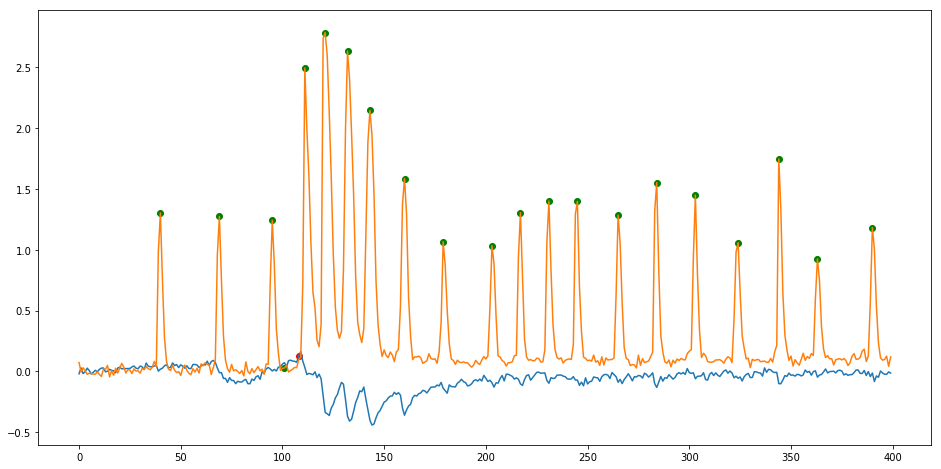

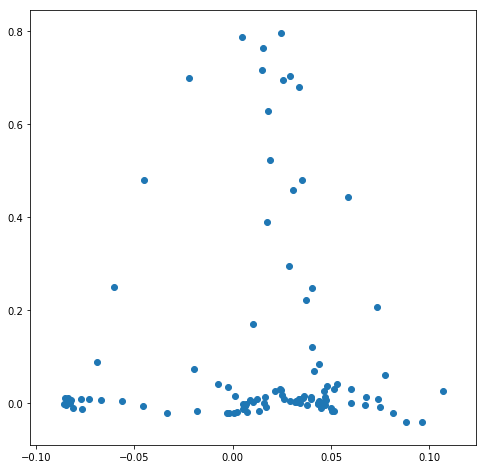

4.170069327402568
10
before_during_after


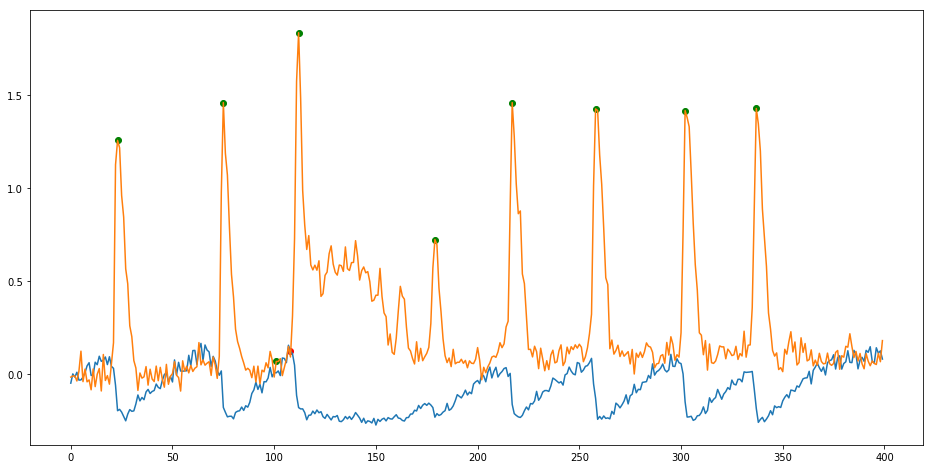

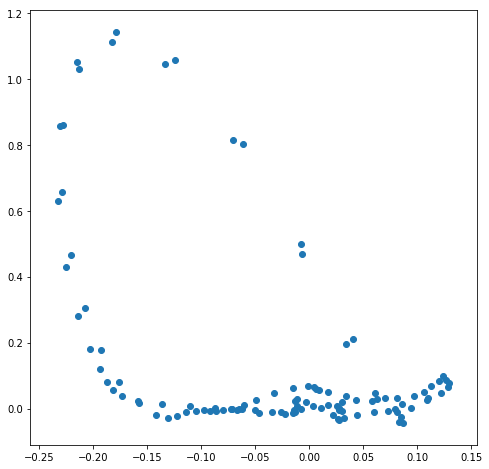

1.557135759993475
11
before_during_after


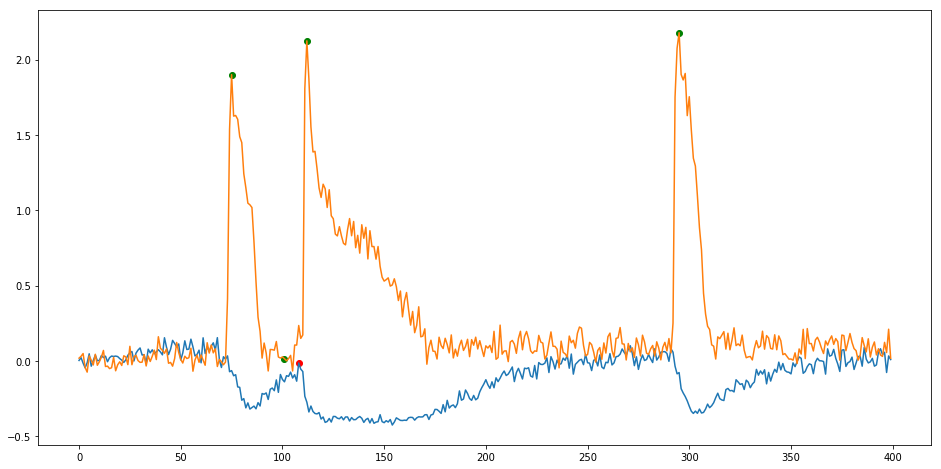

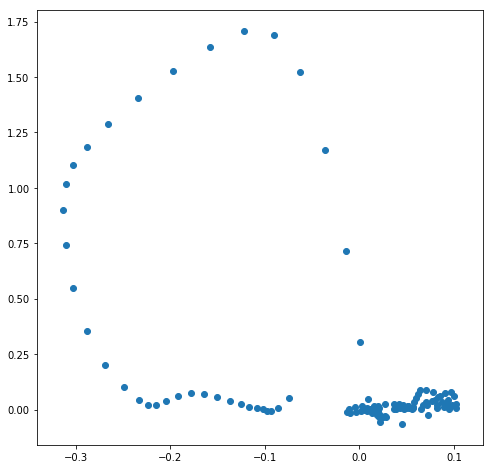

1.887801654972784
12
before_during_after


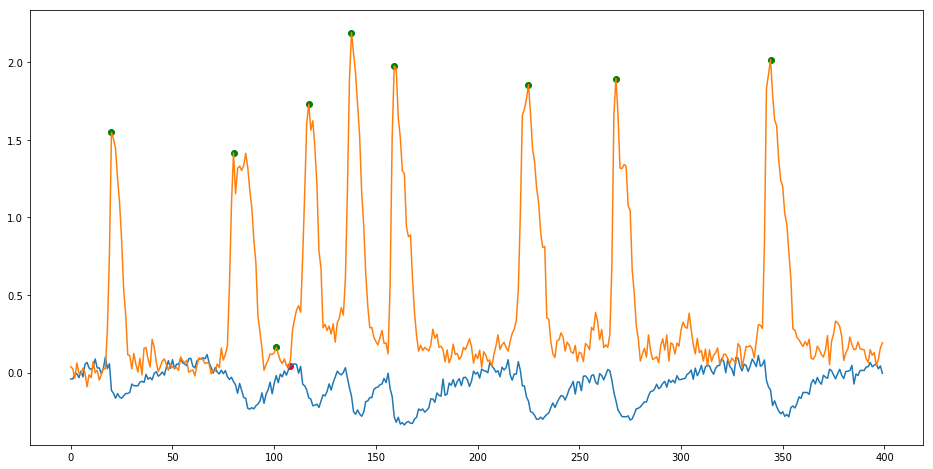

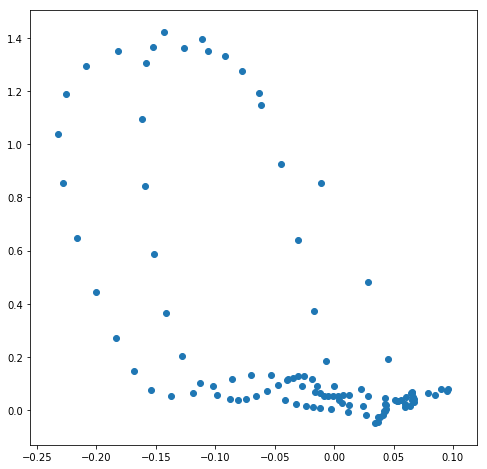

2.2901200404587874
13
during_after


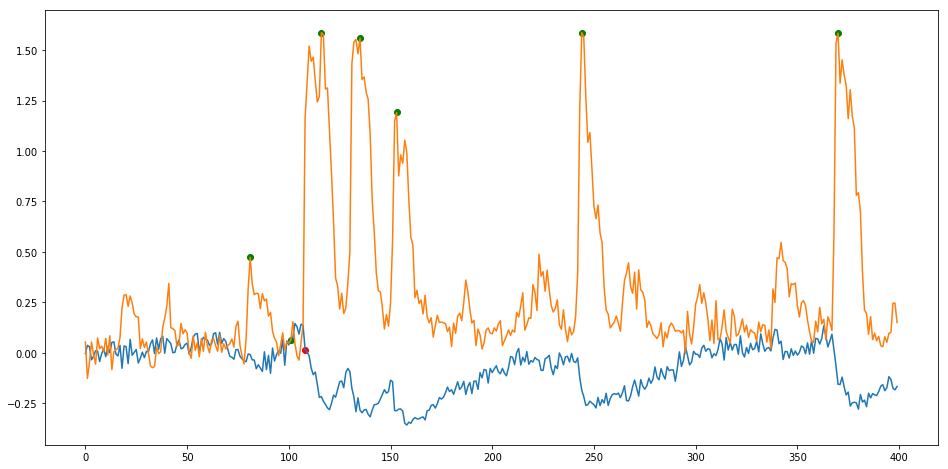

2.910360884749709
14
before_during_after


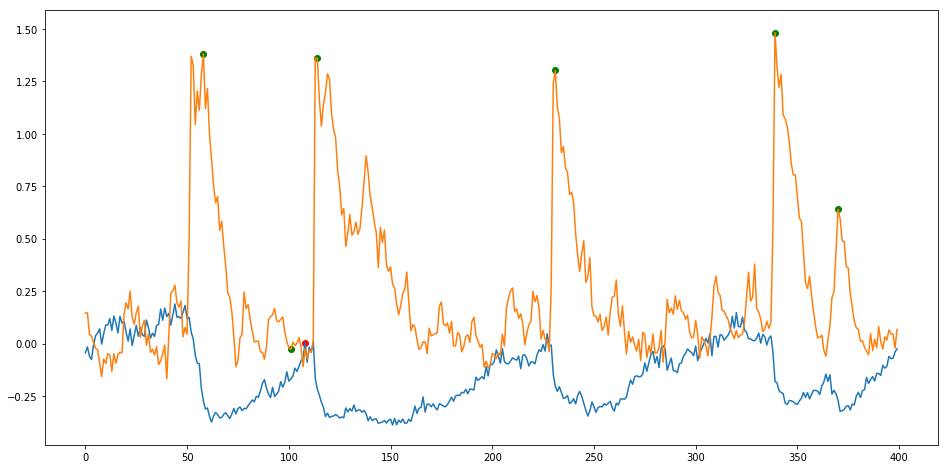

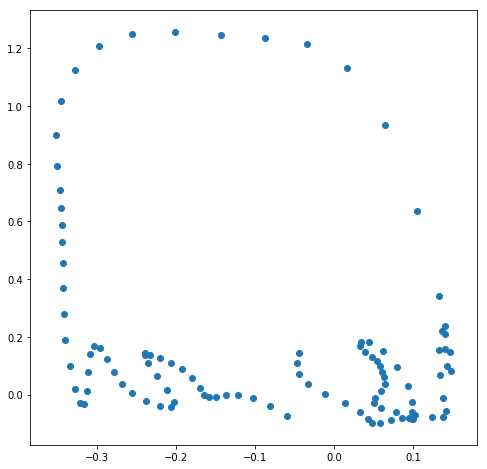

1.6057163502067358
15
before_during_after


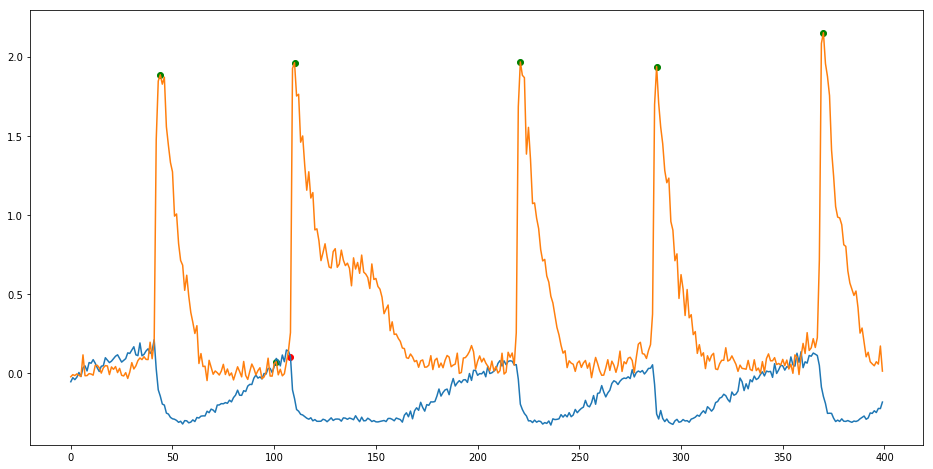

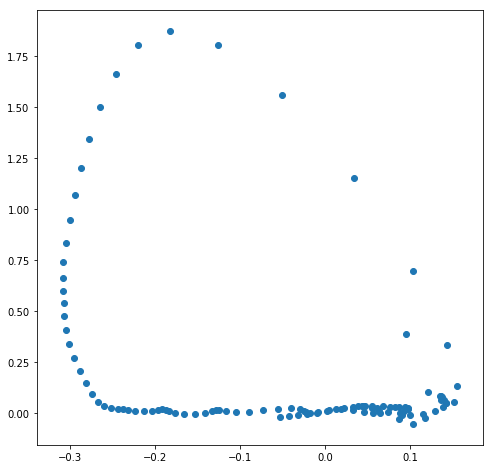

0.8570387881471536
16
before_during_after


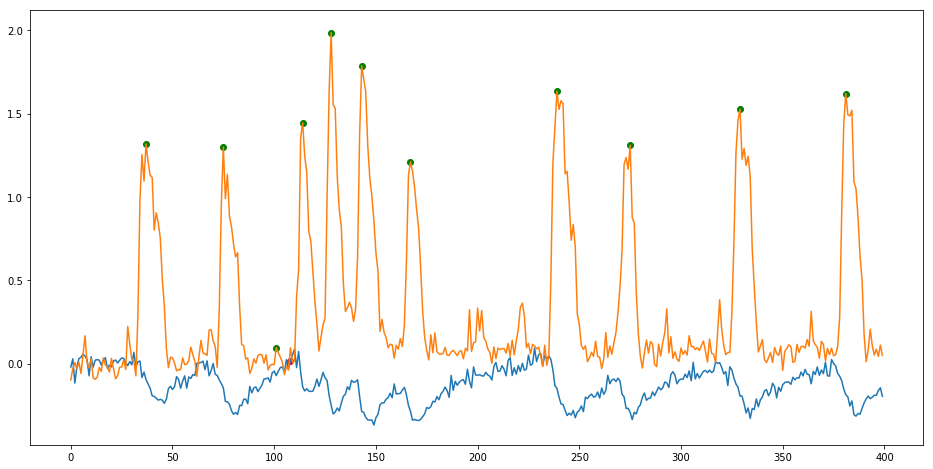

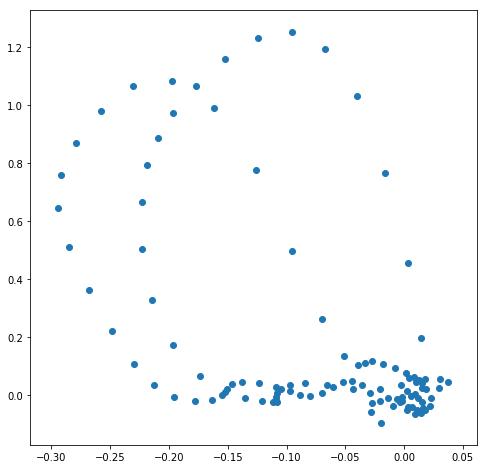

3.9536978056977174
17
before_during_after


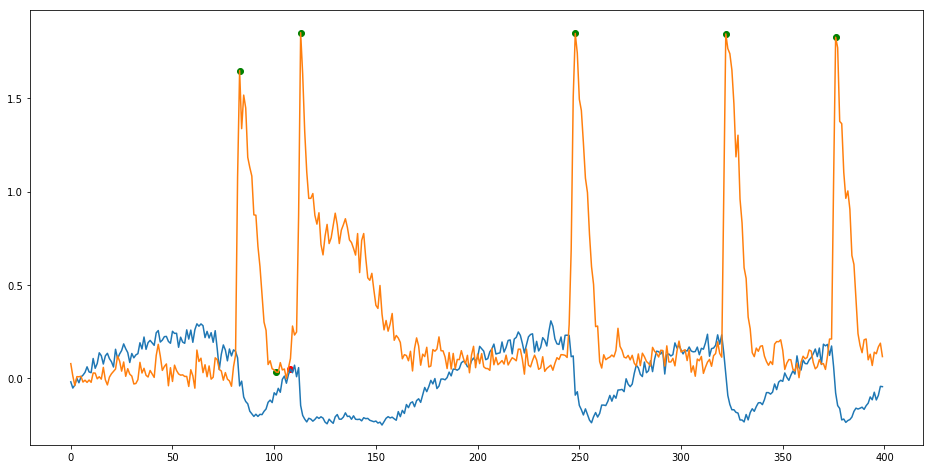

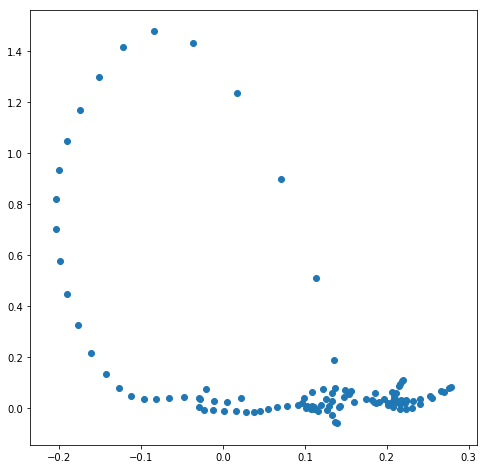

1.3262404031770827
18
during


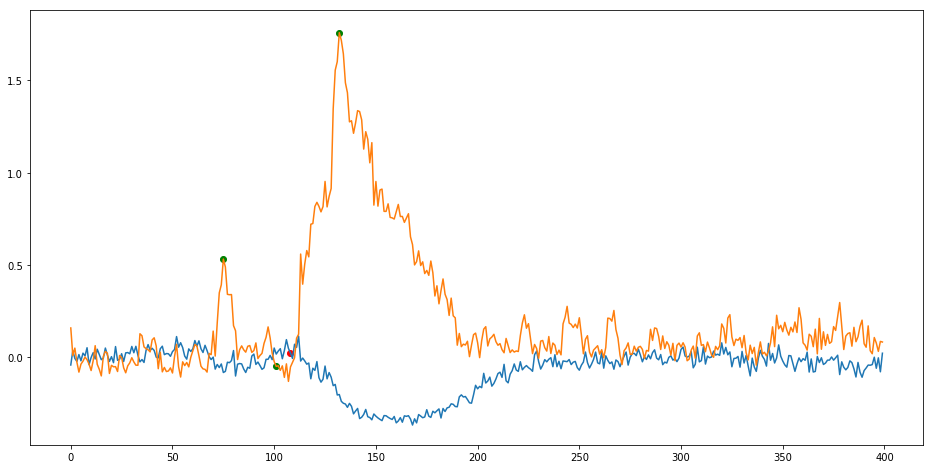

None
19
before_during_after


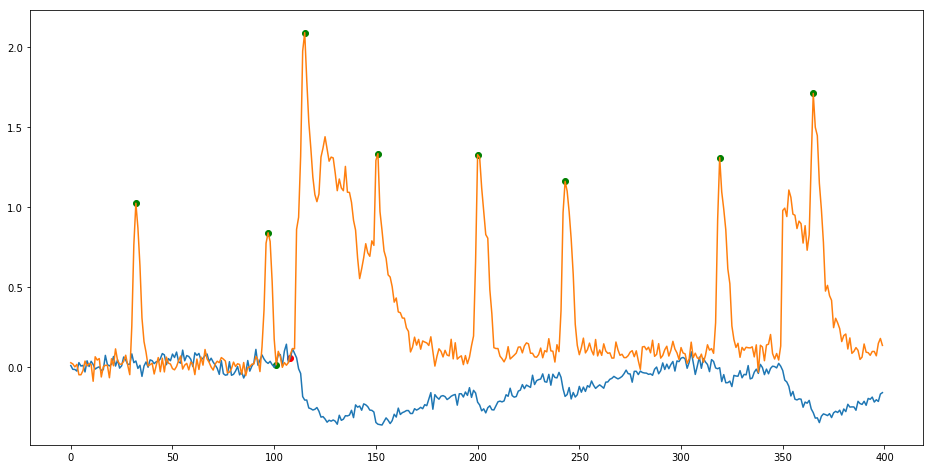

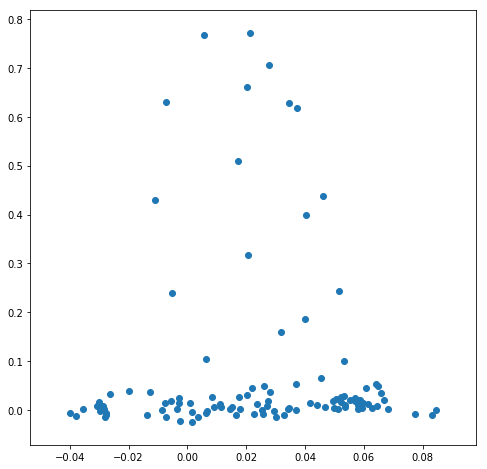

2.1602678732162786
20
during_after


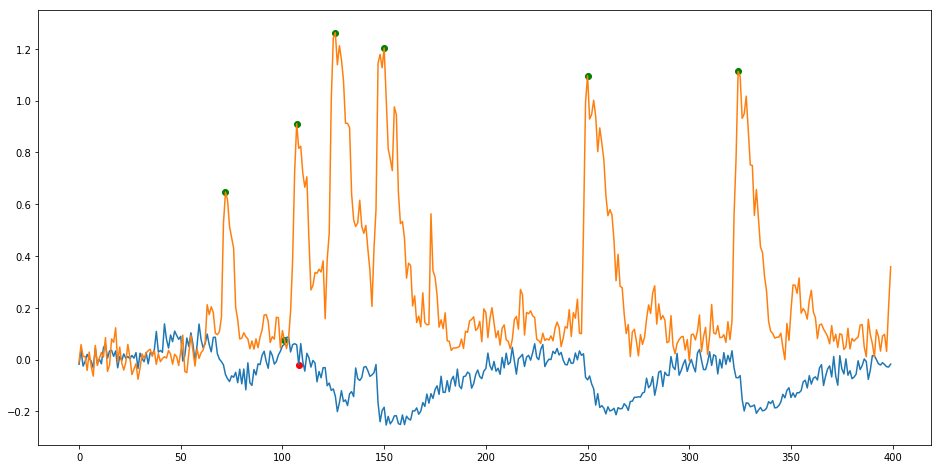

2.6864869705381933
21
during_after


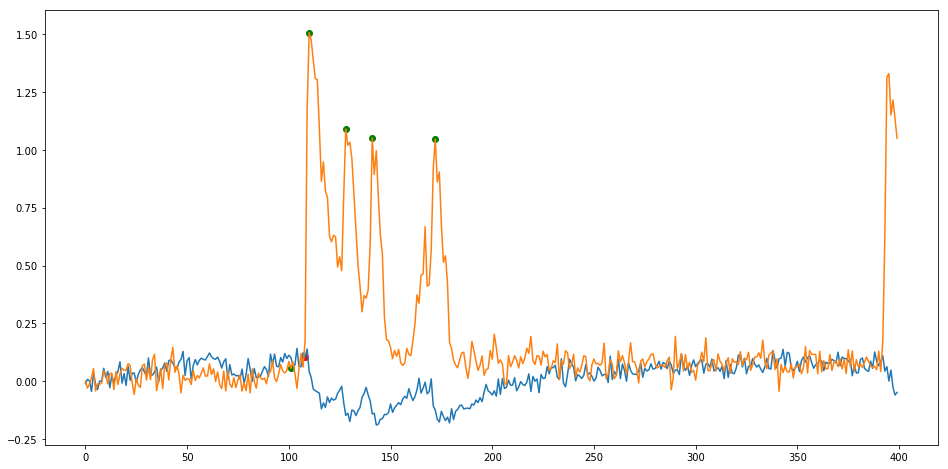

3.3797739306770813
22
during_after


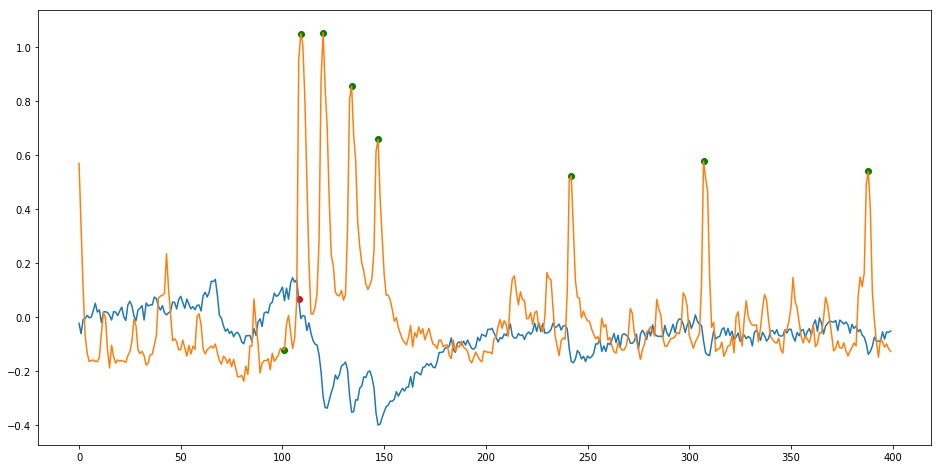

5.514367992157343
23
before_during_after


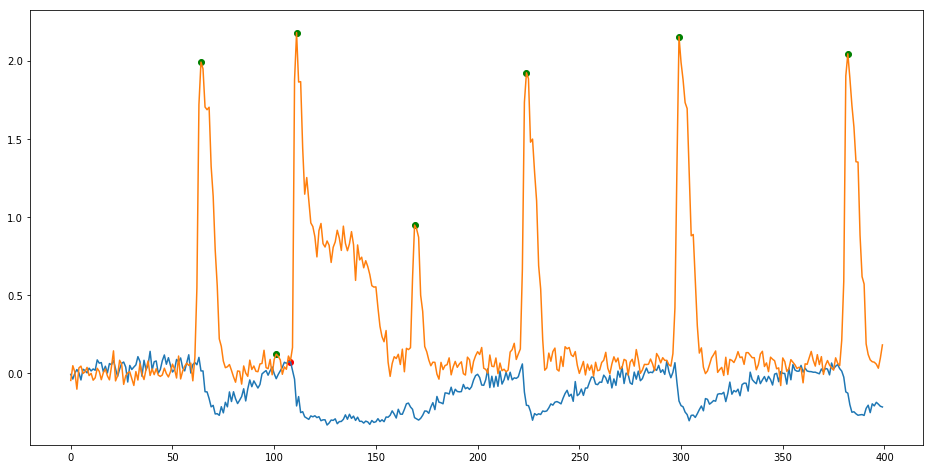

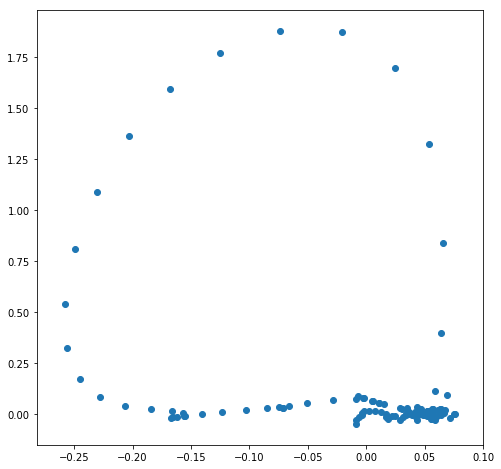

1.0982493904715884
24
before_during_after


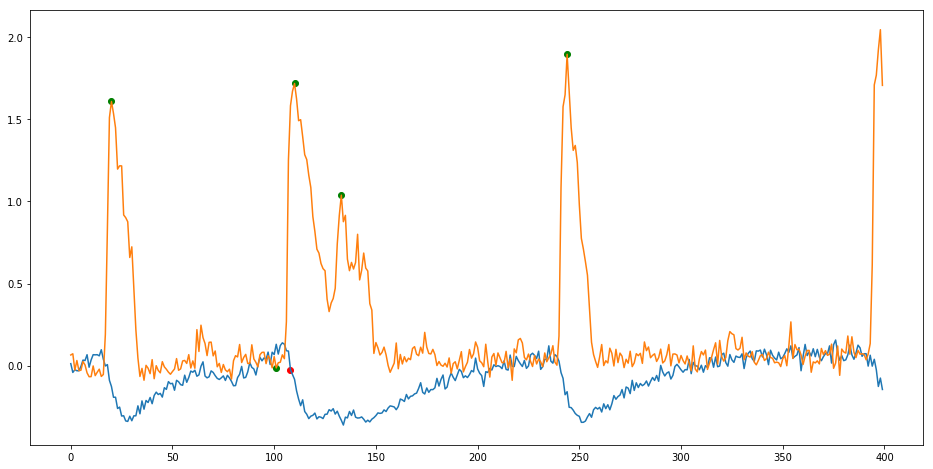

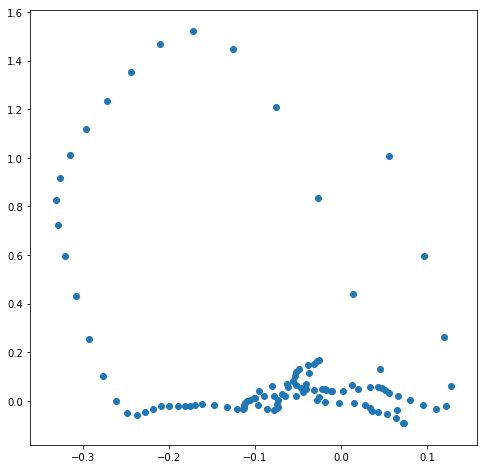

3.0368983145214354
25
during


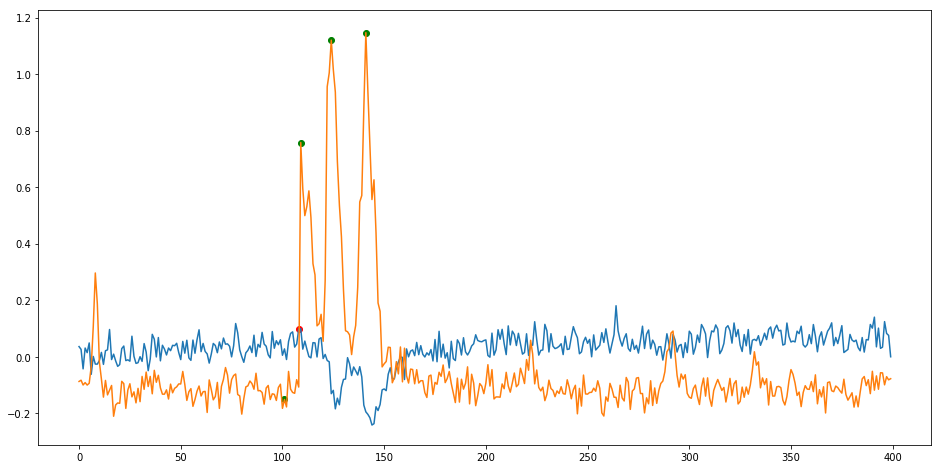

4.365541327124563
26
before_during_after


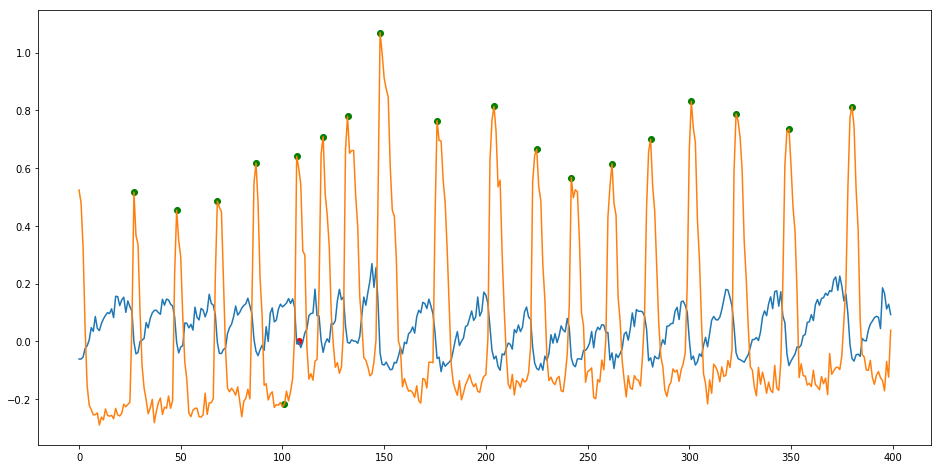

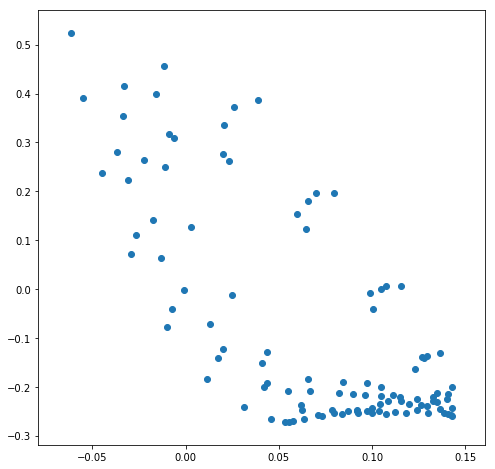

3.4707409308816404
27
before_during_after


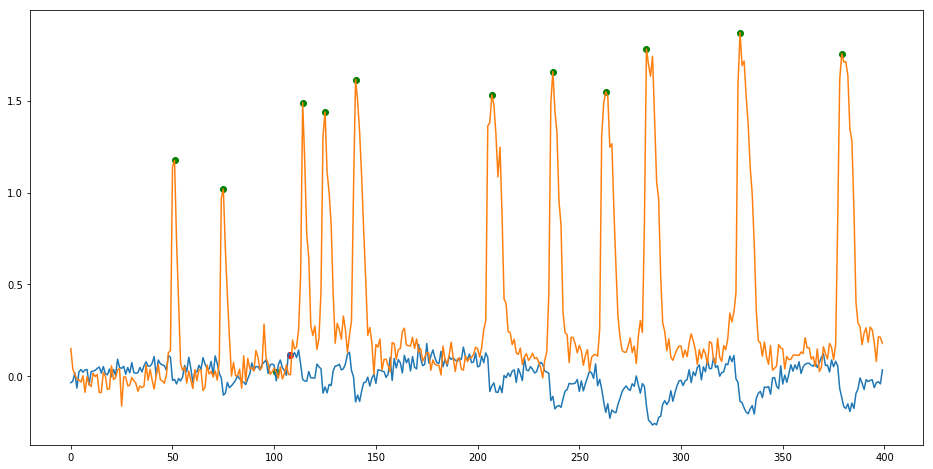

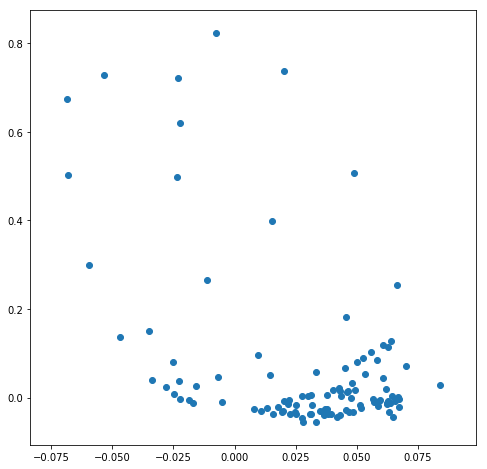

3.6379511059371366
28
before_during_after


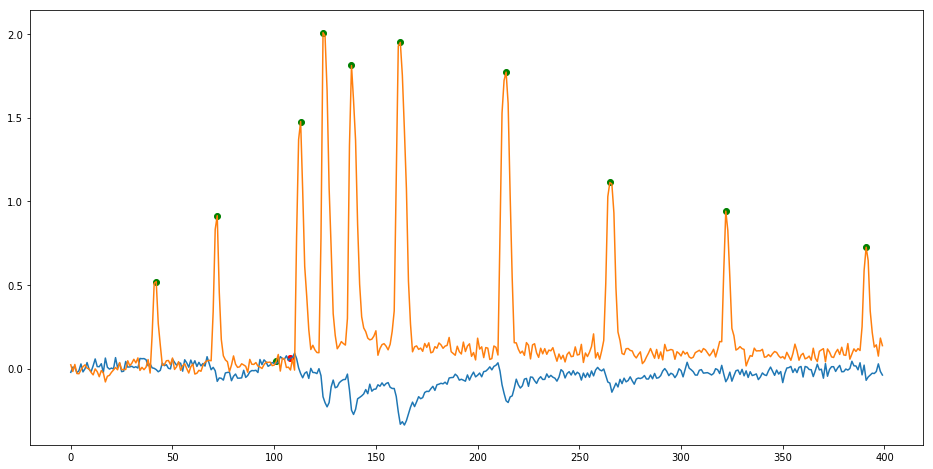

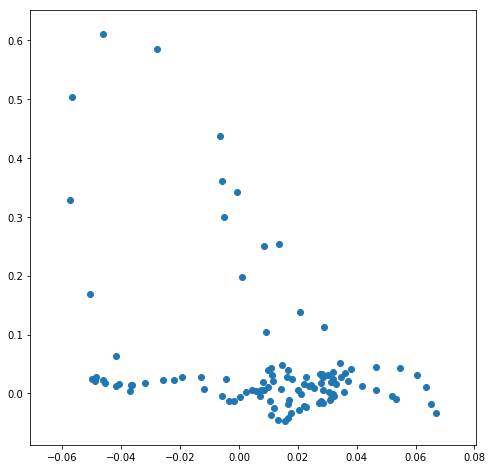

4.276448646979165
29
before_during_after


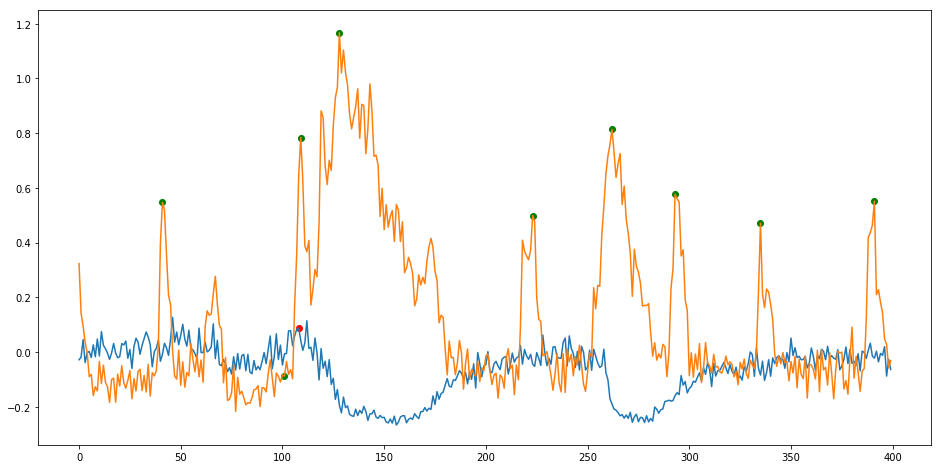

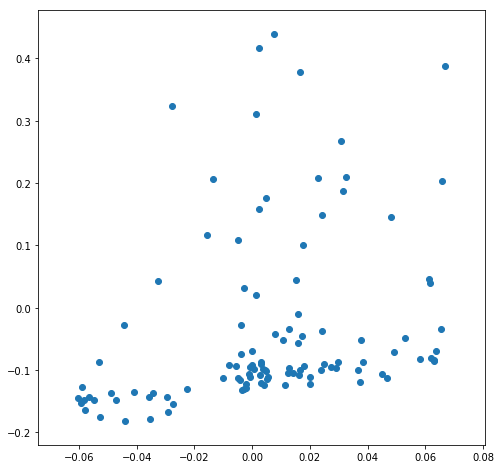

2.1327835491295577
30
before_during


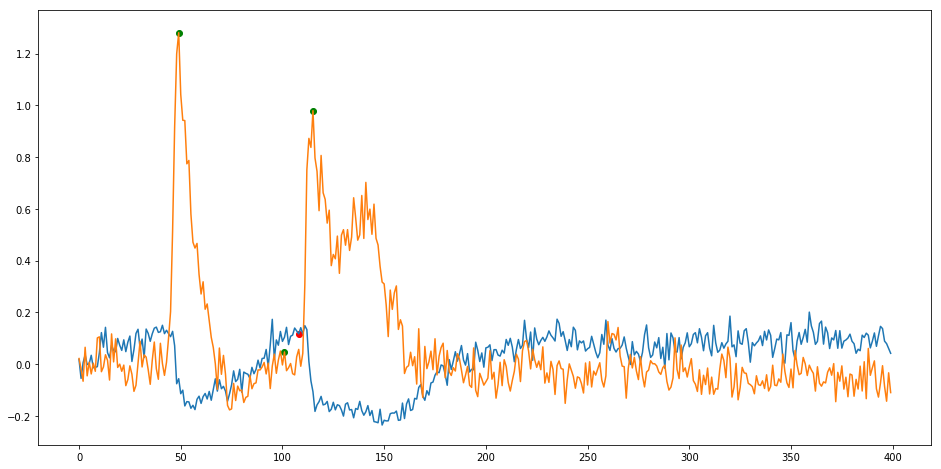

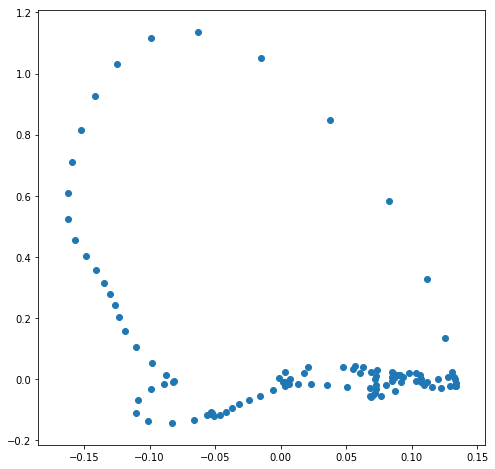

None
31
before_during_after


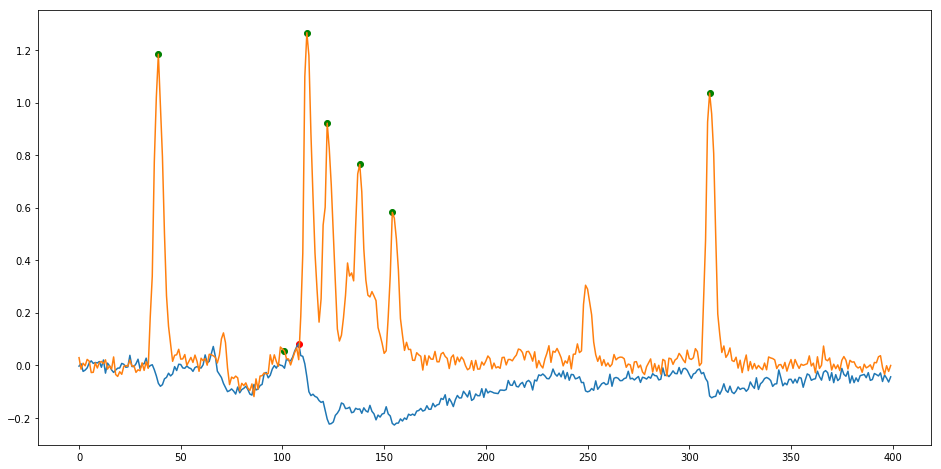

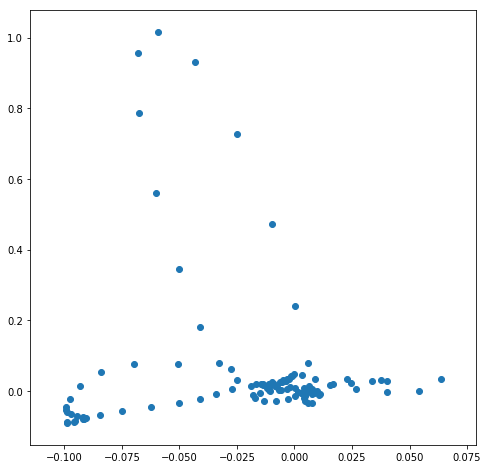

4.989190088142358
32
during_after


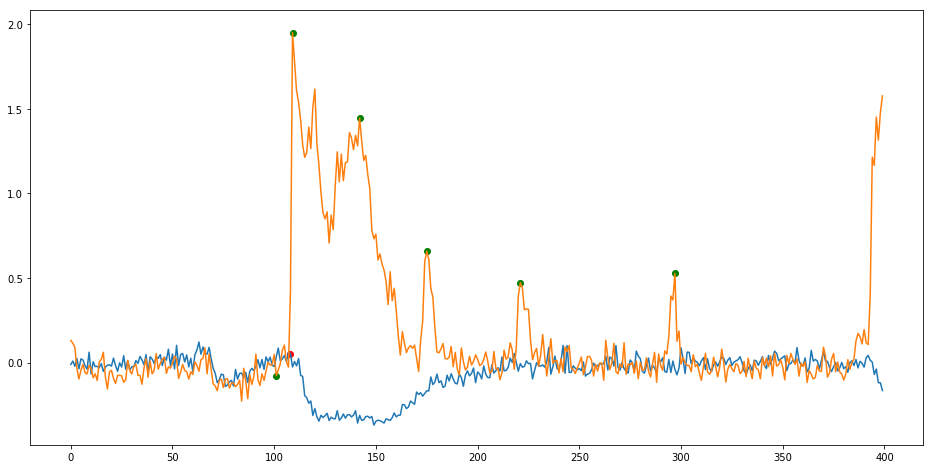

1.4861417283828302
33
before_during_after


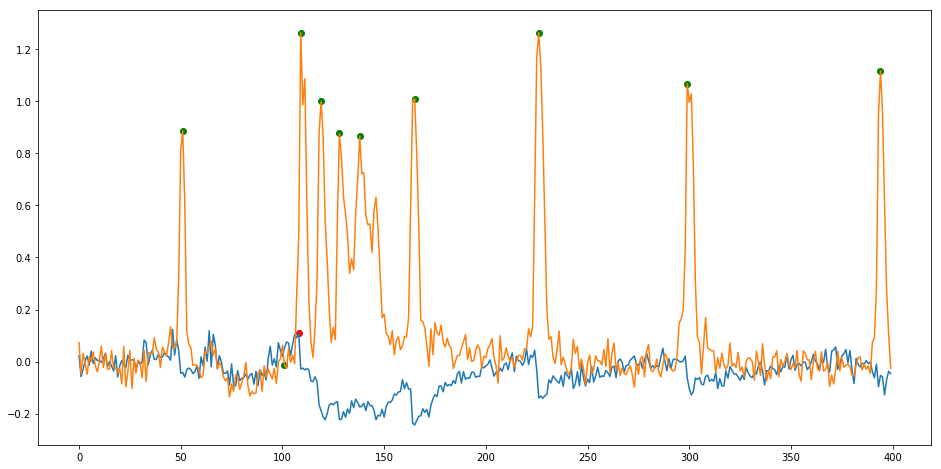

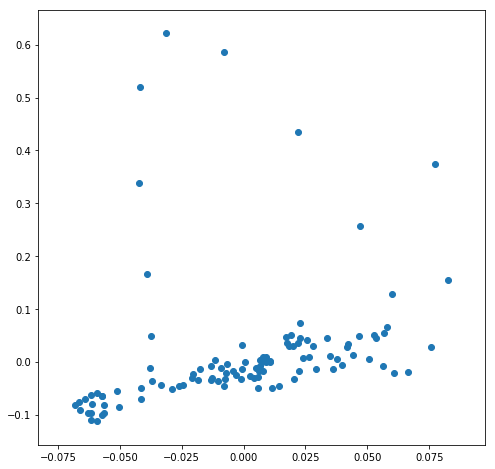

7.225723575930313
34
before_during_after


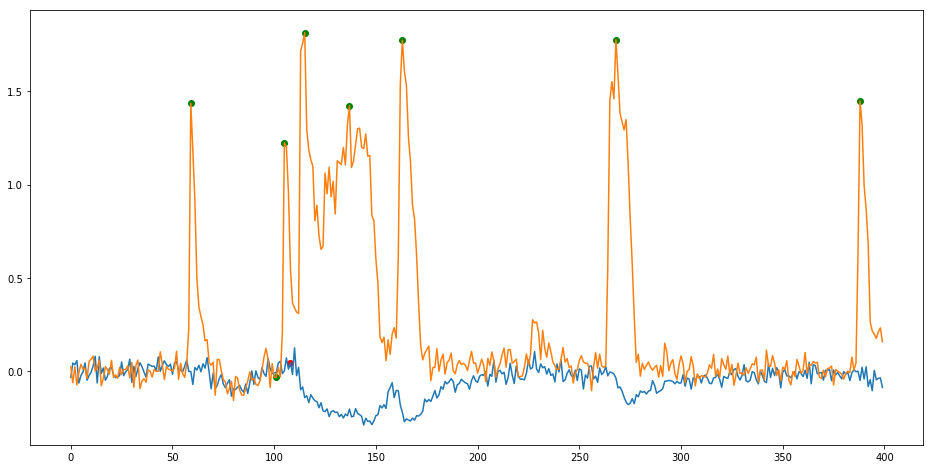

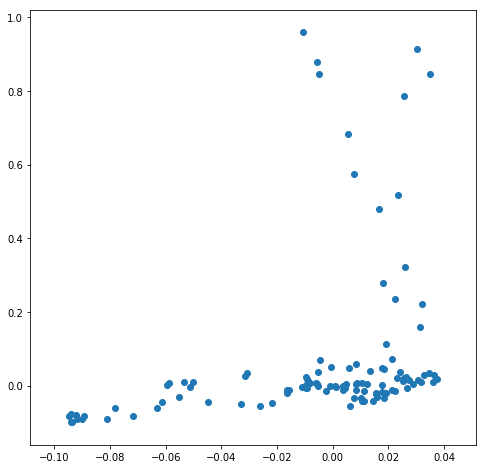

4.365541327124563
35
before_during_after


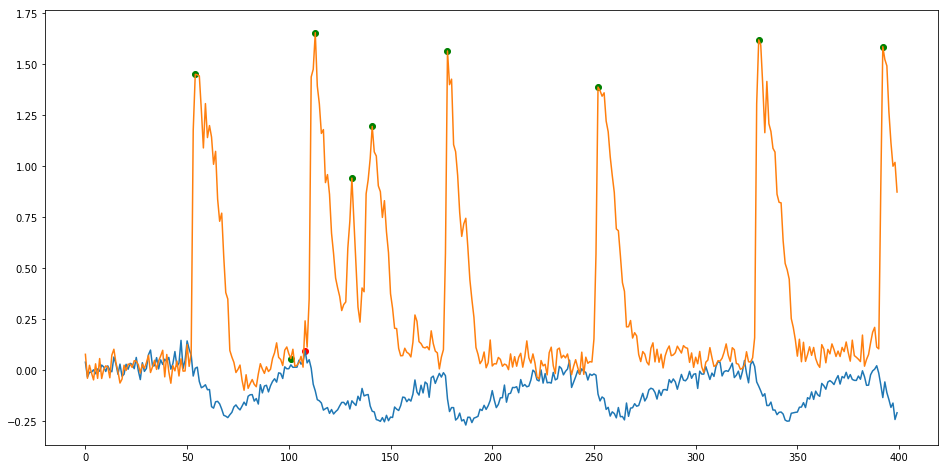

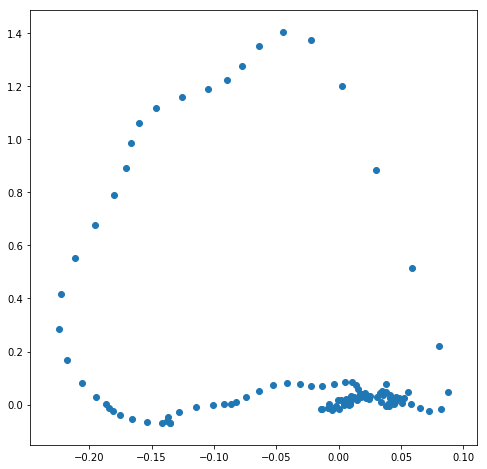

4.989190088142358
36
during_after


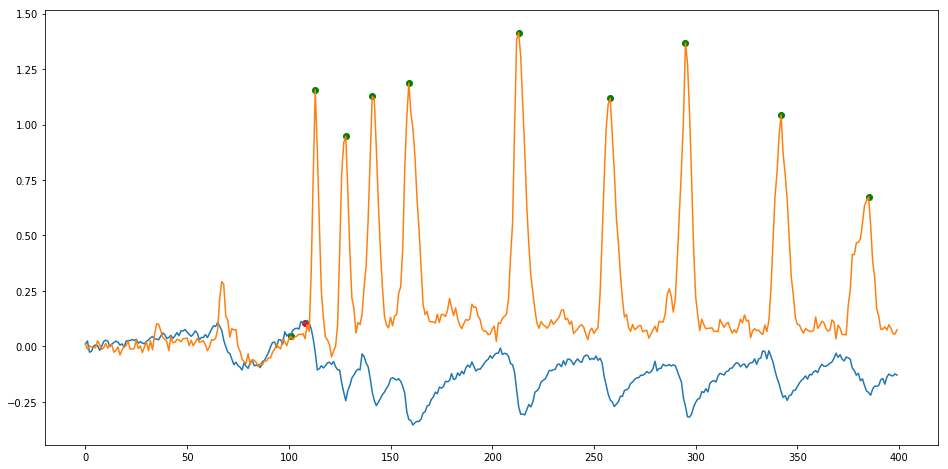

4.555347471782153
37
during


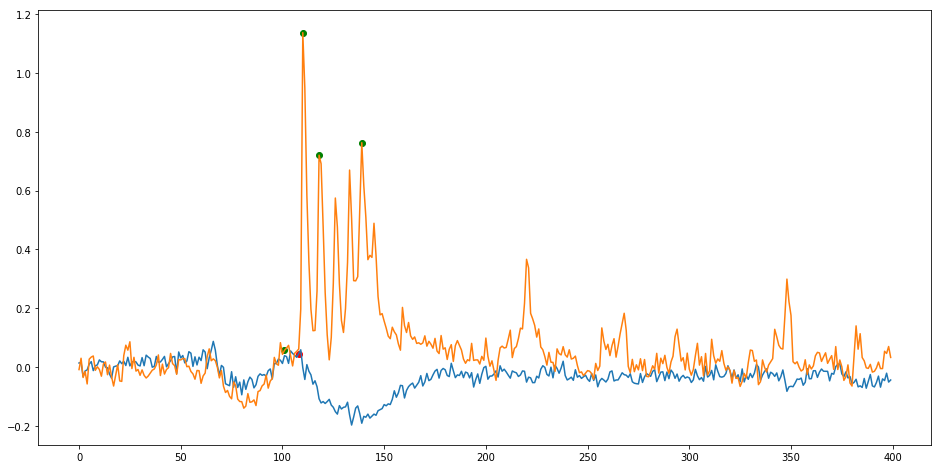

8.731082654249127
38
during_after


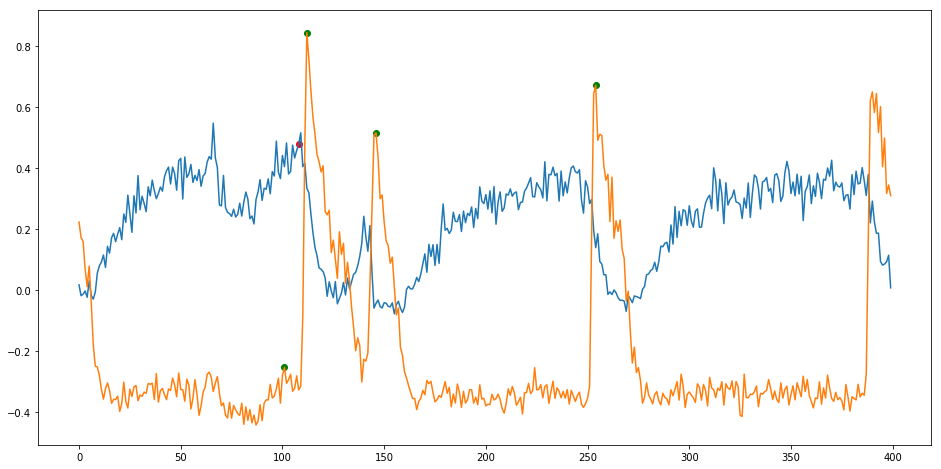

2.0543723892350885
39
before_during_after


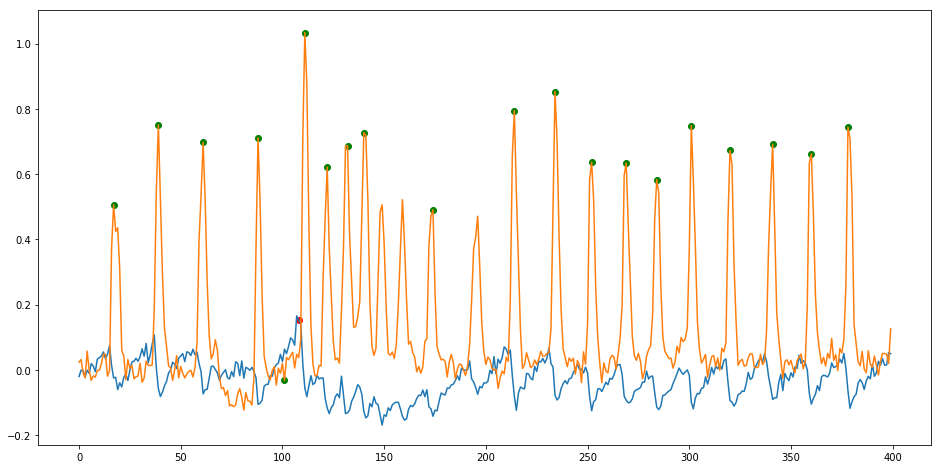

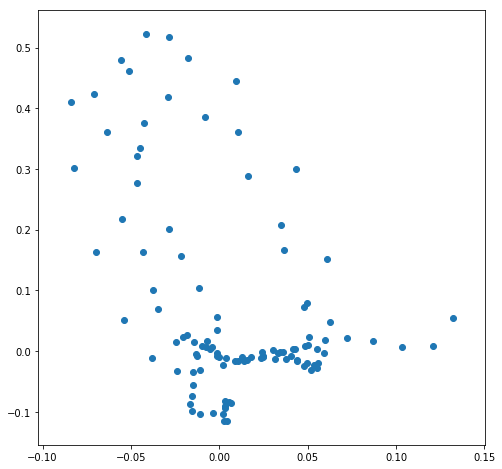

4.595306660131119
40
during_after


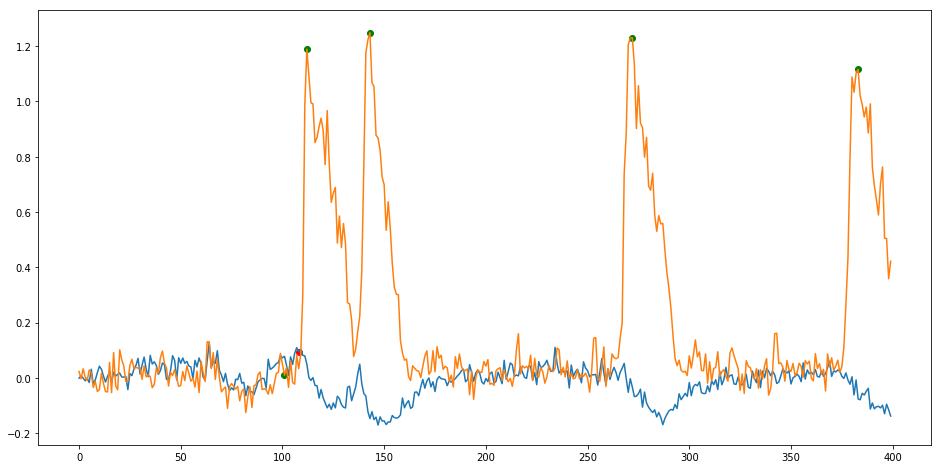

2.253182620451388
41
before_during_after


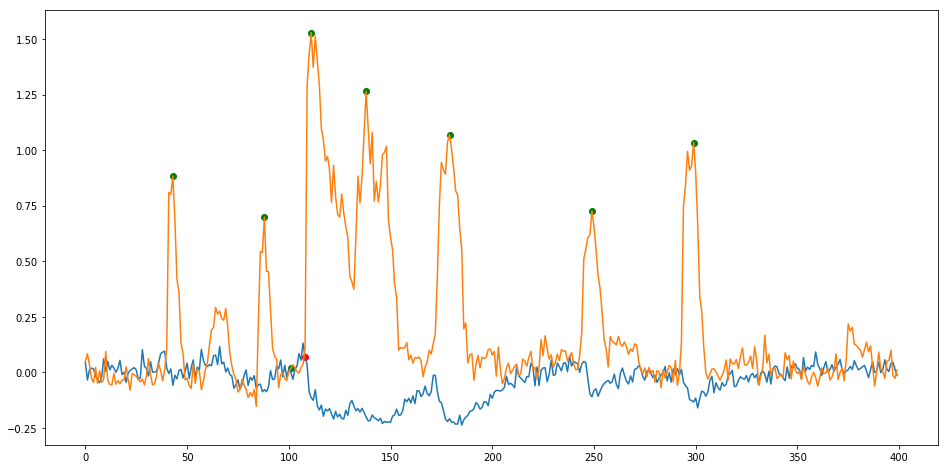

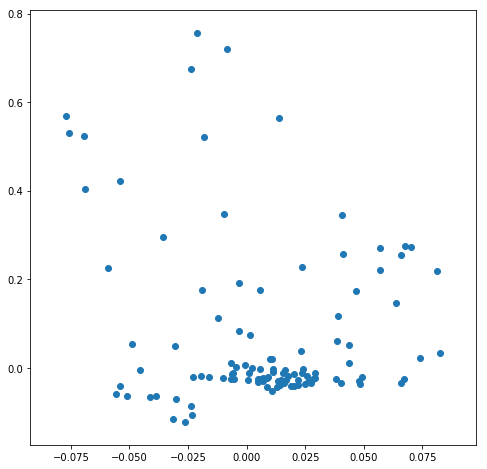

1.8776521837094895
42
during


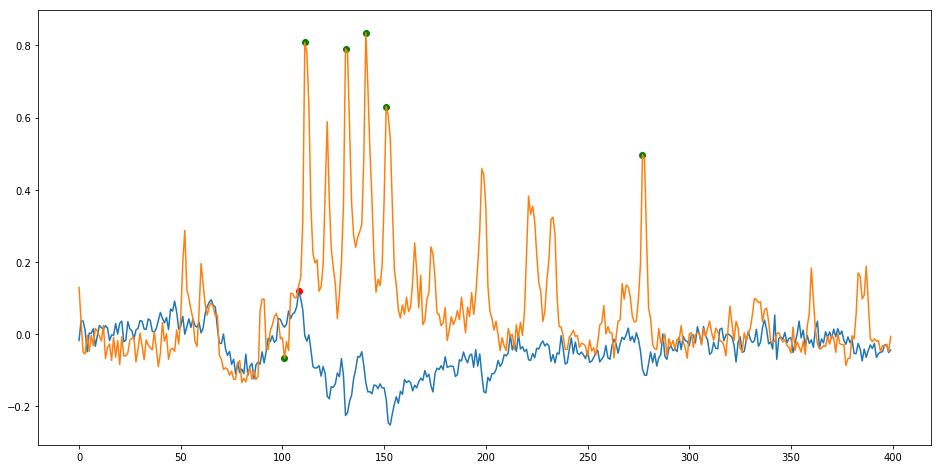

5.238649592549476
43
before_during_after


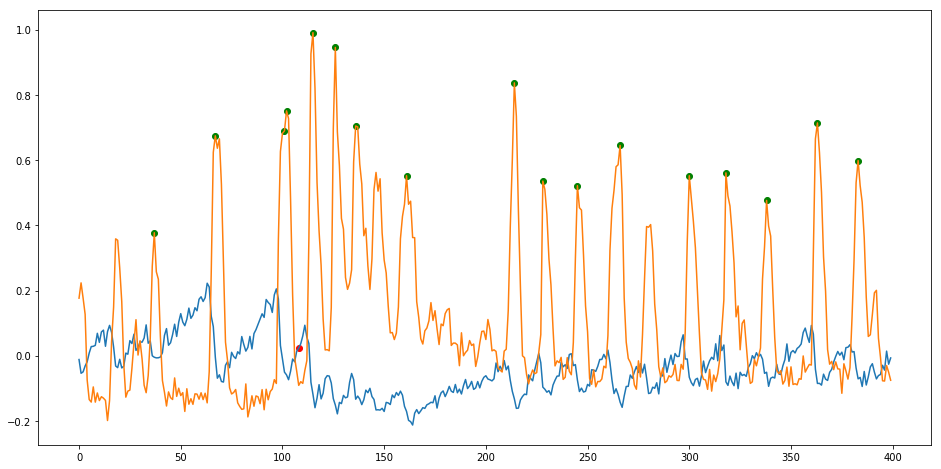

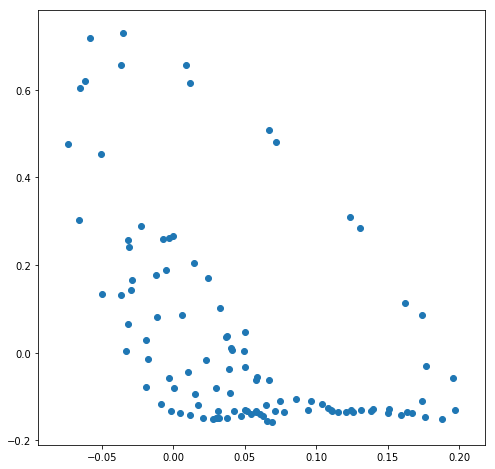

4.365541327124563
44
before_during_after


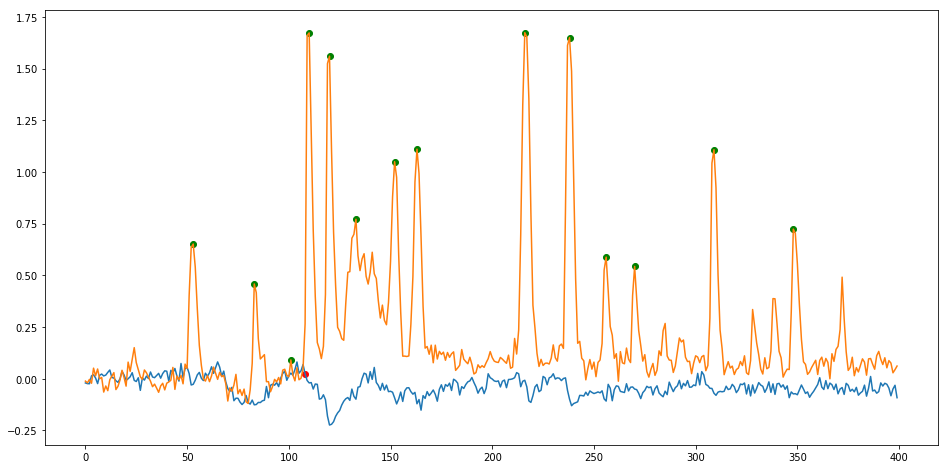

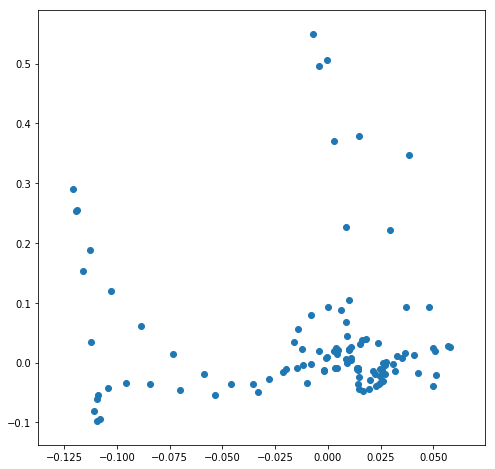

4.569538585401412


In [314]:
cells_no_oscillation_before = []
frequencies = []
counter = 0
for cell in analyse.cells:
    print(counter)
    counter += 1
    #np.where((cell.cy.derivative>0)&(cell.cy.derivative>0))
    print(cell.oscillation)
    
    if 'before' not in cell.oscillation:
        cells_no_oscillation_before.append(cell)
    
    peaks_cy, prominences = find_peaks(cell.cy.signal, prominence=0.5)
    #print(peaks_cy)
    
    plt.figure(figsize=(16,8))
    plt.plot(cell.er.signal)
    plt.plot(cell.cy.signal)
    
    plt.scatter(analyse.experiment_start_er, cell.er.signal[analyse.experiment_start_er], c="r")
    plt.scatter(analyse.experiment_start_cy, cell.cy.signal[analyse.experiment_start_cy], c="g")
    
    plt.scatter(peaks_cy, cell.cy.signal[peaks_cy], c="g")
    
    plt.show()
    
    
    if 'before' in cell.oscillation:
        plt.figure(figsize=(8,8))
        plt.scatter(cell.er.lowpass[:analyse.experiment_start_er], cell.cy.lowpass[:analyse.experiment_start_er])
        plt.show()

    print(cell.frequency_per_min)
    frequencies.append(cell.frequency_per_min)
    #plt.xcorr(cell.er.lowpass,cell.cy.lowpass)

In [279]:
def plot_shapes(cell_number, start=0, end=analyse.experiment_start_er, y_min=None, y_max=None, x_min=None, x_max=None, save=False):
    er_signal = analyse.cells[cell_number].er.signal
    er_lowpass = analyse.cells[cell_number].er.lowpass

    cy_signal = analyse.cells[cell_number].cy.signal
    cy_lowpass = analyse.cells[cell_number].cy.lowpass

    er_diff = analyse.cells[cell_number].er.derivative
    cy_diff = analyse.cells[cell_number].cy.derivative
    
    er_std = np.std(er_diff)/10
    cy_std = np.std(cy_diff)/10
    time_both = analyse.cells[0].time
    
    col = np.where((cy_diff>cy_std)&(er_diff>er_std),'C1',
                    np.where((cy_diff<-cy_std)&(er_diff<-er_std),'C3', 
                    np.where((cy_diff>cy_std)&(er_diff<-er_std),'C0',
                    np.where((cy_diff<-cy_std)&(er_diff>er_std),'C2','white'))))
    
    col_s = np.where((cy_diff>cy_std)&(er_diff>er_std),'C1',
                    np.where((cy_diff<-cy_std)&(er_diff<-er_std),'C3', 
                    np.where((cy_diff>cy_std)&(er_diff<-er_std),'C0',
                    np.where((cy_diff<-cy_std)&(er_diff>er_std),'C2','k'))))

    plot_signals(cell_number, time_both, er_signal, er_lowpass, cy_signal, cy_lowpass, start, end, col, y_min, y_max, save)
    scatter_signals(cell_number, er_lowpass, cy_lowpass, start, end, y_min, y_max, x_min, x_max, save, col=col_s)
    scatter_derivatives(cell_number, er_diff, cy_diff, start, end, save, col=col_s)

In [330]:
def plot_signals(cell_number, time_both, er_signal, er_lowpass, cy_signal, cy_lowpass, start, end, col, y_min, y_max, save=False):
    
    plt.figure(figsize=(12,8))
    plt.plot(time_both, er_signal, linewidth=4, c='k', alpha=0.5)
    plt.plot(time_both, er_lowpass, linewidth=3, c='k')


    plt.plot(time_both, cy_signal, linewidth=4, c='dimgray', alpha=0.5)
    plt.plot(time_both, cy_lowpass, linewidth=3, c='dimgray')

    '''
    for i,color in enumerate(col):
        plt.axvspan(time_both[i],time_both[i+1],facecolor=color, alpha=0.4)
    '''


    ax = plt.gca()
    ax.set_xlim([start*0.859, end*0.859])
    ax.set_ylim([y_min, y_max+0.2])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)
    ax.tick_params(length=10, width=5)
    plt.xticks(fontsize=32, fontname='Arial')
    plt.yticks(fontsize=32, fontname='Arial')

    plt.xlabel('Time [s]', fontsize=34, fontname='Arial')
    plt.ylabel('\u0394F/F0', fontsize=34,fontname='Arial')
    plt.legend(['Cytosol','ER'], fontsize=16, loc='upper right')
    
    if save == True:
        plt.savefig('oscillation_parts'+str(cell_number)+'.png', bbox_inches = "tight")

    plt.show()

In [345]:
def scatter_signals(cell_number, er_lowpass, cy_lowpass, start, end, y_min, y_max, x_min, x_max, save, col):
    plt.figure(figsize=(8,8))
    plt.scatter(er_lowpass[start:end], cy_lowpass[start:end], c='k') #, c=col[start:end]


    plt.axhline(0,c='k', linewidth=4, alpha=0.3) #, linestyle='--'
    plt.axvline(0,c='k', linewidth=4, alpha=0.3)

    ax = plt.gca()
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)
    ax.tick_params(length=10, width=5)
    plt.xticks(fontsize=32, fontname='Arial')
    plt.yticks(fontsize=32, fontname='Arial')

    plt.xlabel('\u0394F/F0 ER', fontsize=34, fontname='Arial')
    plt.ylabel('\u0394F/F0 Cytosol', fontsize=34,fontname='Arial')

    if save == True:
        plt.savefig('oscillation_scatter'+str(cell_number)+'.png', bbox_inches = "tight")

    plt.show()

In [361]:
def scatter_derivatives(cell_number, er_diff, cy_diff, start, end, save, col):
    plt.figure(figsize=(8,8))

    plt.scatter(er_diff[start:end], cy_diff[start:end], c='k') #, c=col[start:end]

    plt.axhline(0,c='k', linewidth=4, alpha=0.3) #, linestyle='--'
    plt.axvline(0,c='k', linewidth=4, alpha=0.3)
    
    plt.xticks(np.arange(-0.06,0.07,0.02))

    ax = plt.gca()
    ax.set_xlim([-0.06,0.06])
    ax.set_ylim([-0.25, 0.3])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)
    ax.tick_params(length=10, width=5)
    plt.xticks(fontsize=32, fontname='Arial')
    plt.yticks(fontsize=32, fontname='Arial')

    plt.xlabel('slope ER', fontsize=34, fontname='Arial')
    plt.ylabel('slope Cytosol', fontsize=34,fontname='Arial')

    if save == True:
        plt.savefig('oscillation_slope'+str(cell_number)+'.png', bbox_inches = "tight")
        print('ok')

    plt.show()

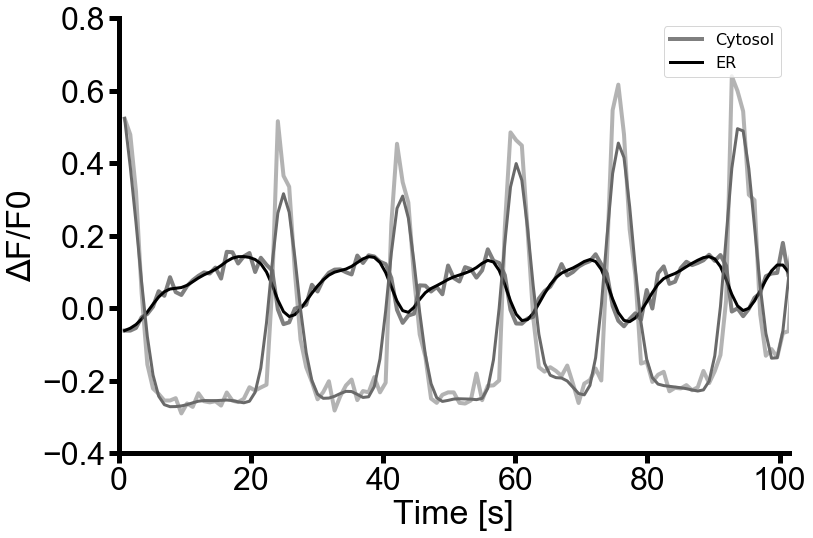

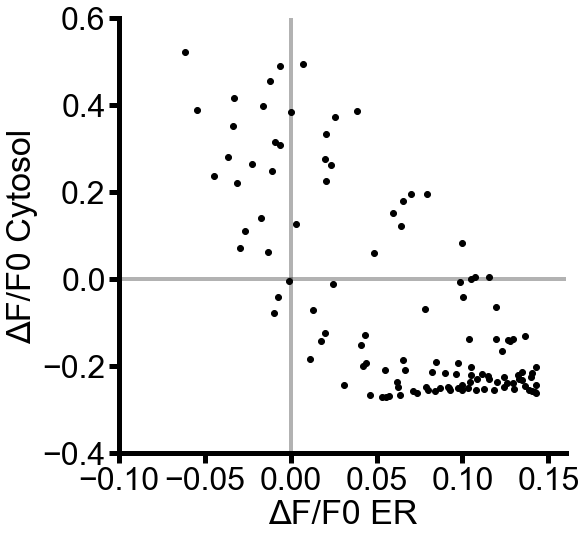

ok


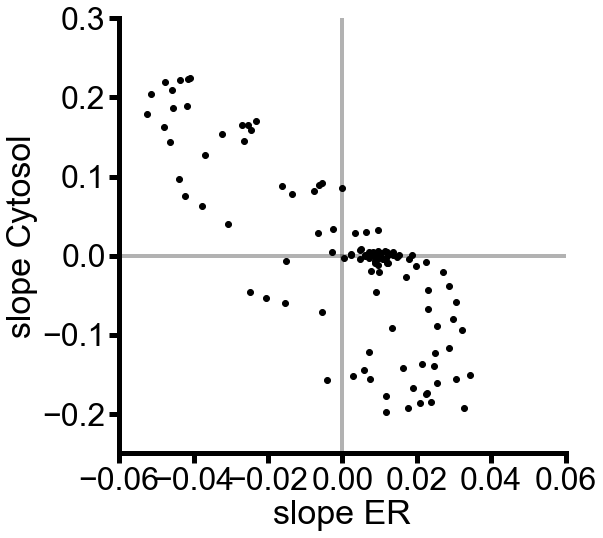

In [363]:
plot_shapes(26,end=118, y_min=-0.4, y_max=0.6, x_min=-0.1, x_max=0.16, save=True)

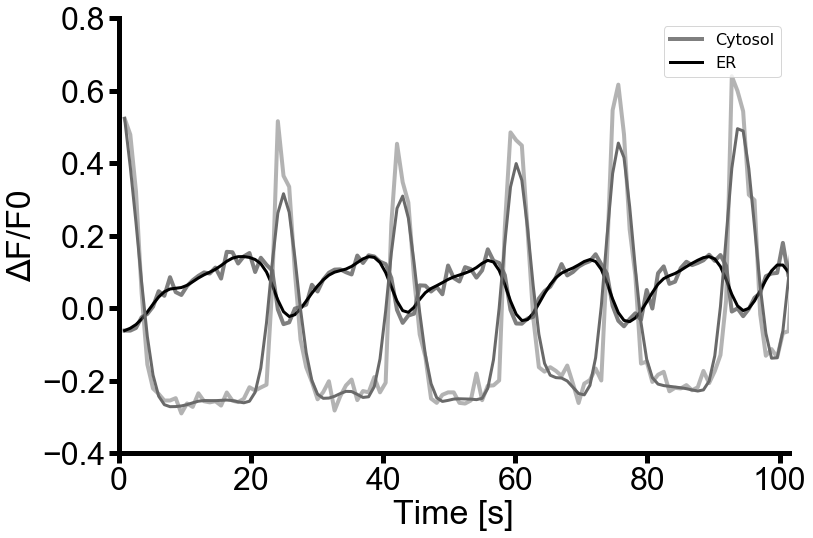

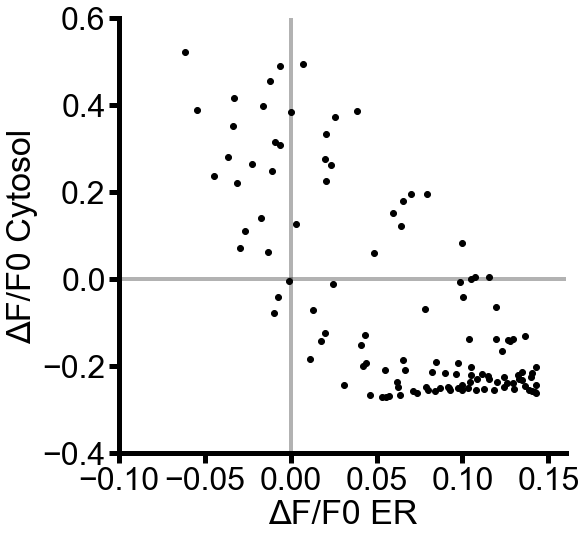

ok


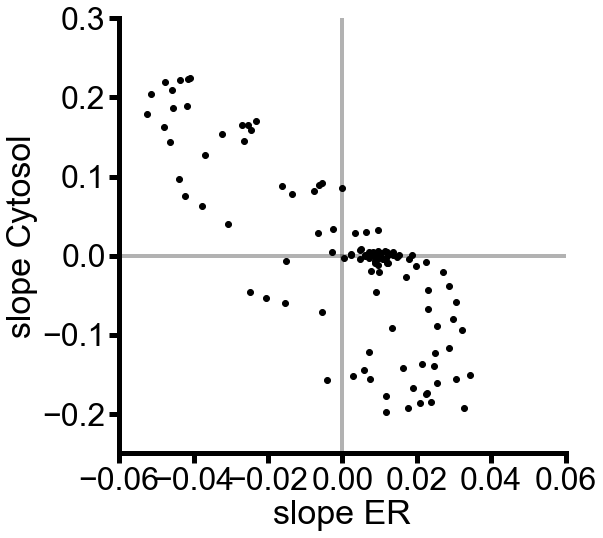

In [363]:
plot_shapes(34,end=118, y_min=-0.6, y_max=1.3, x_min=-0.25, x_max=1.2, save=True)

In [241]:
100/0.895

111.73184357541899